<a href="https://colab.research.google.com/github/puchi-cabrera/my-first-repo/blob/main/Example_DRV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

205
 
`ftol` termination condition is satisfied.
Function evaluations 32, initial cost 1.2781e+03, final cost 1.0106e+01, first-order optimality 2.46e-04.
[2.10464479e+02 3.84890718e+02 4.45524067e-02 1.64047884e+00]
 
0.9997567409207898
 


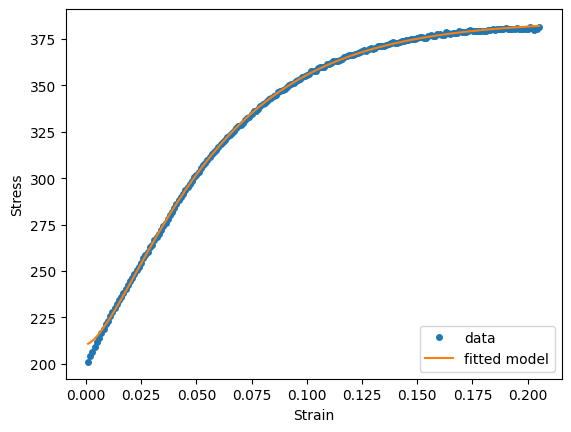

In [ ]:
# Optimization problem considering only DRV

import numpy as np
from scipy.optimize import least_squares
from scipy.optimize import optimize
import matplotlib.pyplot as plt
import pandas as pd

# Imput of the experimentally measured values from Excel:

data0 = pd.read_excel(r'/content/drive/MyDrive/Inconel 625/900 C/900-0.01-1/Data2_DRV.xlsx')
#data0 = pd.read_excel(r'/content/drive/MyDrive/Least Squares Analysis/Prog-2/Data0.xlsx',sheet_name = 'Sheet1')
Strain = data0.iloc[:,0]
Stress = data0.iloc[:,1]
Ndata = len(data0)
print(Ndata)
print(' ')

# Imput of the initial approximations:
#x00 = pd.read_excel(r'//content/drive/MyDrive/Least Squares Analysis/Prog-2/P0.xlsx')
#P0 = x00.iloc[:,1]
#print(P0), print(' ');

# the function to be fitted to the experimental values is:
# y(P,t) = P0 + (P1 - P0)*(1 - exp(-t/P2))**P3

# Definition of the function "y(P,t)":

def Sigma(P, strain):
  Sigma_0 = P[0]; Sigma_s = P[1]; Er = P[2]; m = P[3]
  F = Sigma_0 + (Sigma_s - Sigma_0)*(1 - np.exp(-strain/Er))**m
  return F

# Manual imput of the "experimentally" measured values:

#ts = np.linspace(0, 1, 200)
#K = 1; r = 10; t0 = 0.5; noise = 2
#ys = y([200, 350, 0.25], ts) + noise*np.random.rand(ts.shape[0])

# Definition of the function "fun", which defines the residuals:

def Omega(P,Strain,Stress):
  F = Sigma(P, Strain) - Stress
  return F

# Manual imput of the initial approximations:

P0 = np.array([200,300,0.1,0.5])

# Least-Squares method:

bbounds = ([10,10,0.01,0.05],[500,500,0.5,3])
bbounds2 = ((10,500),(10,500), (0.01,0.5),(0.05,3))

res = least_squares(Omega, P0, bounds = bbounds, method = 'trf', loss='soft_l1', \
                    f_scale=0.1, args = (Strain, Stress), verbose = 1)

#resBrute = optimize.brute(Omega,bbounds2,args = (Strain, Stress),Ns = 100,full_output = True)
#print(resBrute)
#print(' ')


P_final = res.x

print(P_final)
print(' ')

# Plotting the results

Sigma_calc = Sigma(P_final,Strain)

print(np.corrcoef(Stress, Sigma_calc)[0,1])
print(' ')

plt.plot(Strain,Stress,'o',markersize = 4,label = 'data')
plt.plot(Strain,Sigma_calc,label = 'fitted model')
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend(loc = 'lower right')
plt.show()

#dataF1_python = pd.DataFrame([ts,ys]).T
#dataF2_python = pd.DataFrame([ts,y_test]).T
#P0 = pd.DataFrame([res.x]).T

#dataF1_python.to_excel(r'/content/drive/MyDrive/Least Squares Analysis/Prog-2/dataF1_python.xlsx')
#dataF2_python.to_excel(r'/content/drive/MyDrive/Least Squares Analysis/Prog-2/dataF2_python.xlsx')
#P0.to_excel(r'/content/drive/MyDrive/Least Squares Analysis/Prog-2//P0.xlsx')

#print(ts.shape[0])

